## Initialize important libraries and sidefunction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from ema_workbench.analysis import parcoords
from ema_workbench.analysis import pairs_plotting
dirname = os.path.dirname(os.path.abspath('__file__'))
optimizationFolder = os.path.join(dirname, 'OptimizedLevers')

## read files into dataframe

In [3]:
noseedFile = os.path.join(optimizationFolder, 'Optimized-test-noseed.csv')

In [4]:
noSeedDF = pd.read_csv(noseedFile)

In [5]:
print(noSeedDF.head())

   Unnamed: 0        c1        c2        r1        r2        w1     max_P  \
0           0  0.059758  0.501135  0.825364  0.782580  0.608781  1.677608   
1           1  0.731797 -0.405389  1.781087  1.735291  0.152616  1.998748   
2           2  0.283180 -0.345009  0.128024  1.817939  0.593807  2.154146   
3           3  0.253371  0.537923  0.082011  1.000558  0.251027  2.179276   
4           4  1.076847  0.259639  1.953089  0.747075  0.278089  1.456467   

    utility   inertia  reliability  
0  0.605900  0.960606       0.8055  
1  1.414163  0.967475       0.1752  
2  1.002358  0.928889       0.5052  
3  1.147957  0.940202       0.4170  
4  0.502110  0.970909       0.9049  


In [6]:
seedZeroFile = os.path.join(optimizationFolder, 'Optimized-test-seed-0.csv')

In [7]:
seedZeroDF = pd.read_csv(seedZeroFile)

In [8]:
seedOneFile = os.path.join(optimizationFolder, 'Optimized-test-seed-1.csv')

In [9]:
seedOneDF = pd.read_csv(seedOneFile)

In [10]:
seedTwoFile = os.path.join(optimizationFolder, 'Optimized-test-seed-2.csv')

In [11]:
seedTwoDF = pd.read_csv(seedTwoFile)

In [12]:
seedThreeFile = os.path.join(optimizationFolder, 'Optimized-test-seed-3.csv')

In [13]:
seedThreeDF = pd.read_csv(seedThreeFile)

In [14]:
seedFourFile = os.path.join(optimizationFolder, 'Optimized-test-seed-4.csv')

In [15]:
seedFourDF = pd.read_csv(seedFourFile)

In [16]:
seedFiveFile = os.path.join(optimizationFolder, 'Optimized-test-seed-5.csv')

In [17]:
seedFiveDF = pd.read_csv(seedFiveFile)

## combined relevant dataframes into one

In [18]:
combinedDf = pd.concat([seedZeroDF, seedOneDF, seedTwoDF, seedThreeDF, seedFourDF, seedFiveDF])

## Do an initial check on the dataframe

In [19]:
print(len(combinedDf))
print(combinedDf.iloc[163])

167
Unnamed: 0     24.000000
c1             -0.324775
c2              0.253803
r1              1.410187
r2              0.100195
w1              0.226319
max_P           2.196261
utility         1.208674
inertia         0.871919
reliability     0.400800
Name: 24, dtype: float64


In [20]:
combinedDf = pd.concat([seedZeroDF, seedOneDF, seedTwoDF, seedThreeDF, seedFourDF, seedFiveDF])
combinedDf = combinedDf.iloc[:, 1:]
experiments = combinedDf.iloc[:, :5]
results = combinedDf.iloc[:, 5:]
print(experiments.head())

         c1        c2        r1        r2        w1
0  1.802450  0.183060  1.800693  1.285729  0.040240
1  1.829102  0.267789  1.838607  1.249223  0.036178
2  1.384701 -0.138807  1.344161  1.455575  0.046610
3  0.233947  0.611339  0.066833  1.278342  0.314042
4  0.972244  0.336045  1.326903  0.770784  0.131817


# Caclulate diversity maximization and choose best 5

## first some initial figures to get a better understanding of the solutions

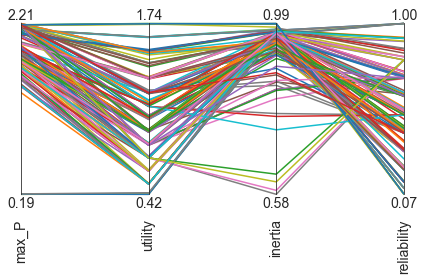

In [21]:
# outcomes = combinedDf.loc[:, [ 'max_P', 'utility', 'inertia', 'reliability']]
outcomes = results
limits = parcoords.get_limits(outcomes)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes)
plt.savefig ('OptimizedLevers/Figures/results.png')
plt.show()

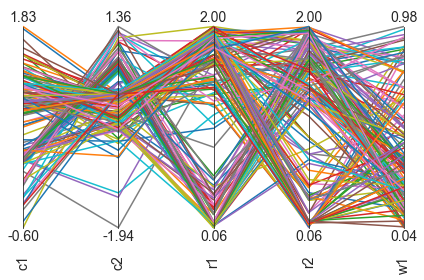

In [22]:
outcomes = experiments
limits = parcoords.get_limits(outcomes)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes)
plt.savefig ('OptimizedLevers/Figures/levers.png')
plt.show()

In [23]:
print(len(combinedDf))

167


In [26]:
duplicateRowsDF = results[results.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [max_P, utility, inertia, reliability]
Index: []


In [27]:
def pairsPlotEMA(df, savename, limits=None, groupby=None):
    x = df[['c1', 'c2', 'r1', 'r2', 'w1']]
    y = df[['max_P', 'utility', 'inertia', 'reliability']]
    y = y.to_dict('list')
    y['max_P'] = np.asarray(y['max_P'])
    y['utility'] = np.asarray(y['utility'])
    y['inertia'] = np.asarray(y['inertia'])
    y['reliability'] = np.asarray(y['reliability'])
    # y['type'] = np.asarray(y['type'])
    # print(y)

    fig, axes = pairs_plotting.pairs_scatter(x, y, group_by=groupby,
                                         legend=True)
        
    if limits is not None:
        for ax in axes:
            axes[ax].set_xlim(limits[ax].get_xlim())
            axes[ax].set_ylim(limits[ax].get_ylim())

    fig.set_size_inches(8,8)
    
    plt.savefig('Results/Figures/'+str(savename)+'_scatterplot.png')
    plt.show()

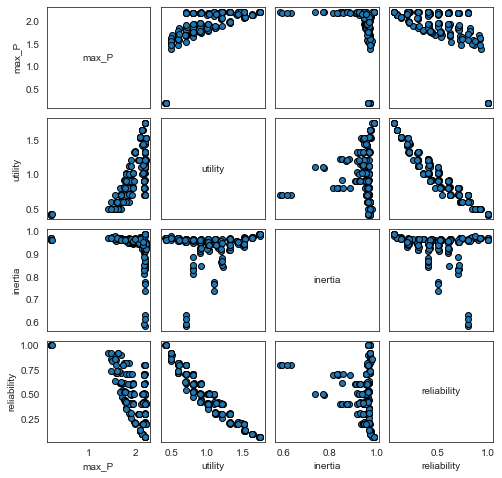

In [28]:
pairsPlotEMA(combinedDf, "optimization_test")

In [ ]:

def nearestNeighbour(points):
    

## play with the GMM algorithm (gaussian mixture models)

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

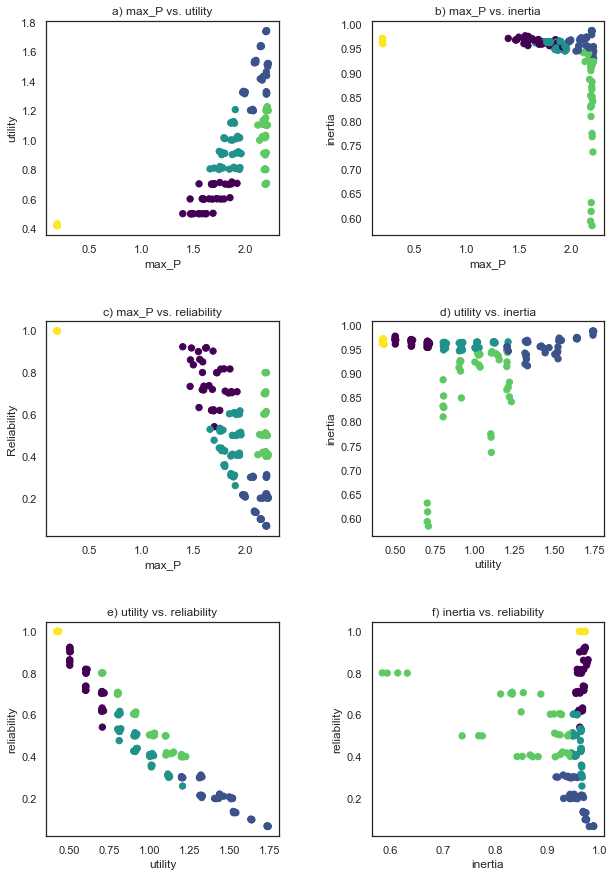

In [155]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec
kmeans = KMeans(5, random_state=0)
labels = kmeans.fit(results).predict(results)
gs = gridspec.GridSpec(2, 3)
# fig, ax = plt.subplots(6, gs[0,0], figsize=(10, 20))

fig = plt.figure( figsize=(10,15))
gs = gridspec.GridSpec(3, 2)
# 
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 0])
ax4 = plt.subplot(gs[1, 1])
ax5 = plt.subplot(gs[2, 0])
ax6 = plt.subplot(gs[2,1])


ax1.scatter(results.iloc[:, 0], results.iloc[:, 1], c=labels, s=40, cmap='viridis')
ax1.set_xlabel('max_P')
ax1.set_ylabel('utility')
ax1.set_title('a) max_P vs. utility')
ax2.scatter(results.iloc[:, 0], results.iloc[:, 2], c=labels, s=40, cmap='viridis')
ax2.set_xlabel('max_P')
ax2.set_ylabel('inertia')
ax2.set_title('b) max_P vs. inertia')
ax3.scatter(results.iloc[:, 0], results.iloc[:, 3], c=labels, s=40, cmap='viridis')
ax3.set_xlabel('max_P')
ax3.set_ylabel('Reliability')
ax3.set_title('c) max_P vs. reliability')

ax4.scatter(results.iloc[:, 1], results.iloc[:, 2], c=labels, s=40, cmap='viridis')
ax4.set_xlabel('utility')
ax4.set_ylabel('inertia')
ax4.set_title('d) utility vs. inertia')

ax5.scatter(results.iloc[:, 1], results.iloc[:, 3], c=labels, s=40, cmap='viridis')
ax5.set_xlabel('utility')
ax5.set_ylabel('reliability')
ax5.set_title('e) utility vs. reliability')

ax6.scatter(results.iloc[:, 2], results.iloc[:, 3], c=labels, s=40, cmap='viridis')
ax6.set_xlabel('inertia')
ax6.set_ylabel('reliability')
ax6.set_title('f) inertia vs. reliability')

# ax[0].scatter(results.iloc[:, 0], results.iloc[:, 1], c=labels, s=40, cmap='viridis')
# ax[0].set_xlabel('max_P')
# ax[0].set_ylabel('utility')
# ax[1].scatter(results.iloc[:, 0], results.iloc[:, 2], c=labels, s=40, cmap='viridis')
# ax[1].set_xlabel('max_P')
# ax[1].set_ylabel('inertia')
# ax[2].scatter(results.iloc[:, 0], results.iloc[:, 3], c=labels, s=40, cmap='viridis')
# ax[2].set_xlabel('max_P')
# ax[2].set_ylabel('Reliability')

# ax[3].scatter(results.iloc[:, 1], results.iloc[:, 2], c=labels, s=40, cmap='viridis')
# ax[3].set_xlabel('utility')
# ax[3].set_ylabel('inertia')

# ax[4].scatter(results.iloc[:, 1], results.iloc[:, 3], c=labels, s=40, cmap='viridis')
# ax[4].set_xlabel('utility')
# ax[4].set_ylabel('Reliability')

# ax[5].scatter(results.iloc[:, 2], results.iloc[:, 3], c=labels, s=40, cmap='viridis')
# ax[5].set_xlabel('inertia')
# ax[5].set_ylabel('Reliability')
# gs.update(left=0.04, right=0.4, wspace=0.05)
plt.subplots_adjust( wspace=0.4, hspace=0.4)
plt.savefig('OptimizedLevers/Figures/groupresultsCombined.png')
plt.show()

In [156]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=5, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 2], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

## clearly show the cliques

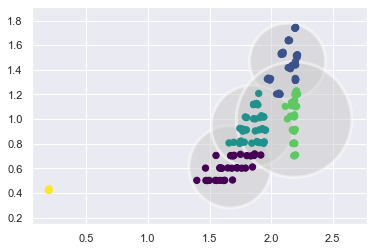

In [38]:
kmeans = KMeans(n_clusters=5, random_state=0)
plot_kmeans(kmeans, results)

In [39]:
rng = np.random.RandomState(13)
X_stretched = np.dot(results, rng.randn(2, 2))

kmeans = KMeans(n_clusters=5, random_state=0)
plot_kmeans(kmeans, X_stretched)

ValueError: shapes (167,4) and (2,2) not aligned: 4 (dim 1) != 2 (dim 0)

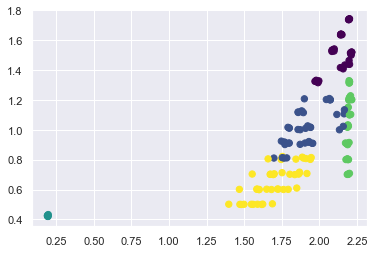

In [61]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=5).fit(results)
labels = gmm.predict(results)
plt.scatter(results.iloc[:, 0], results.iloc[:, 1], c=labels, s=40, cmap='viridis');

## get the means of each clique

In [49]:
probs = gmm.predict_proba(results)
print(probs[:5].round(3))

[[0.024 0.    0.    0.976]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.768 0.    0.232]
 [1.    0.    0.    0.   ]]


In [62]:
best = gmm.means_
print(best)

[[2.13146683 1.52988486 0.96519381 0.15547206]
 [1.91616804 1.01822738 0.95560915 0.40691384]
 [0.19395542 0.42435583 0.96664984 1.        ]
 [2.19381089 1.04020532 0.85778242 0.52276691]
 [1.70464938 0.65592264 0.96396761 0.72054612]]


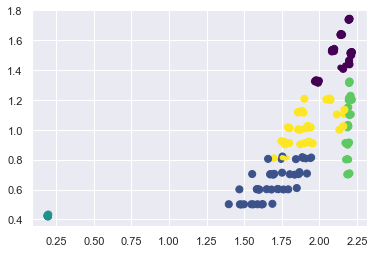

In [56]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(results.iloc[:, 0], results.iloc[:, 1], c=labels, cmap='viridis', s=size);

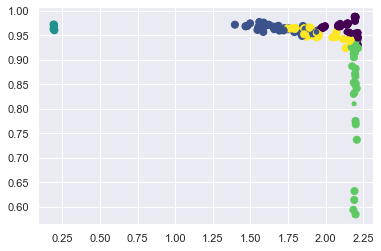

In [54]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(results.iloc[:, 0], results.iloc[:, 2], c=labels, cmap='viridis', s=size);

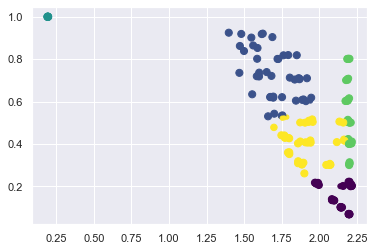

In [55]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(results.iloc[:, 0], results.iloc[:, 3], c=labels, cmap='viridis', s=size);

In [44]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [45]:
gmm = mixture.GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm,results)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

In [69]:
bestDf = pd.DataFrame(best, columns=['max_P', 'utility', 'inertia', 'reliability'])
print(bestDf)

      max_P   utility   inertia  reliability
0  2.131467  1.529885  0.965194     0.155472
1  1.916168  1.018227  0.955609     0.406914
2  0.193955  0.424356  0.966650     1.000000
3  2.193811  1.040205  0.857782     0.522767
4  1.704649  0.655923  0.963968     0.720546


In [90]:
testdf = pd.merge(combinedDf, bestDf, how='right')
print(len(testdf))
print(testdf.tail())

5
   c1  c2  r1  r2  w1     max_P   utility   inertia  reliability
0 NaN NaN NaN NaN NaN  2.131467  1.529885  0.965194     0.155472
1 NaN NaN NaN NaN NaN  1.916168  1.018227  0.955609     0.406914
2 NaN NaN NaN NaN NaN  0.193955  0.424356  0.966650     1.000000
3 NaN NaN NaN NaN NaN  2.193811  1.040205  0.857782     0.522767
4 NaN NaN NaN NaN NaN  1.704649  0.655923  0.963968     0.720546


In [91]:
print(combinedDf[combinedDf['max_P'] == 2.131467])

Empty DataFrame
Columns: [c1, c2, r1, r2, w1, max_P, utility, inertia, reliability]
Index: []


In [96]:
arrayOne = bestDf.iloc[0]
print(arrayOne)

max_P          2.131467
utility        1.529885
inertia        0.965194
reliability    0.155472
Name: 0, dtype: float64


## use nearest neighbours of the cliques as solutions, since the mean itself does not exist in the results

In [97]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1, radius=0.4)
neigh.fit(results)

NearestNeighbors(n_neighbors=1, radius=0.4)

In [99]:
neigh.kneighbors([bestDf.iloc[0]], 1, return_distance=False)

array([[70]], dtype=int64)

In [101]:
neigh.kneighbors([bestDf.iloc[1]], 1, return_distance=False)

array([[81]], dtype=int64)

In [102]:
neigh.kneighbors([bestDf.iloc[2]], 1, return_distance=False)

array([[88]], dtype=int64)

In [103]:
neigh.kneighbors([bestDf.iloc[3]], 1, return_distance=False)

array([[43]], dtype=int64)

In [104]:
neigh.kneighbors([bestDf.iloc[4]], 1, return_distance=False)

array([[31]], dtype=int64)

In [1]:
print(combinedDf.iloc[[70, 81,88,43,31]].to_latex(index=False))

NameError: name 'combinedDf' is not defined